In [3]:
# ===============================
# 📌 1) Import Libraries
# ===============================
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [7]:
# 📌 2) Load CSV 
# ===============================
df = pd.read_csv(r'C:\Users\Lenovo\Desktop\jpmorgan\Nat_Gas.csv')
print("First 5 rows of data:")
print(df.head())

First 5 rows of data:
      Dates  Prices
0  10/31/20    10.1
1  11/30/20    10.3
2  12/31/20    11.0
3   1/31/21    10.9
4   2/28/21    10.9


In [9]:
# 📌 3) Parse Dates & Set Index
# ===============================
df['Dates'] = pd.to_datetime(df['Dates'])
df.set_index('Dates', inplace=True)

print("\nData Info:")
print(df.info())



Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2020-10-31 to 2024-09-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Prices  48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes
None


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16724\1130523283.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


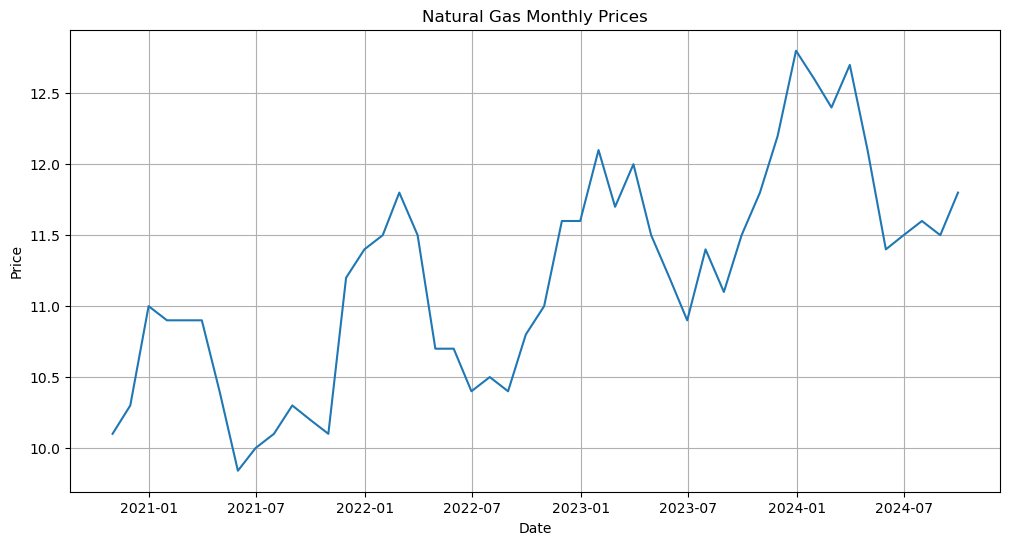

In [11]:
# 📌 4) Plot the Time Series
# ===============================
plt.figure(figsize=(12,6))
plt.plot(df['Prices'])
plt.title('Natural Gas Monthly Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [13]:
# 📌 5) Build ARIMA Model
# ===============================
# Simple ARIMA(p,d,q) - you can tune later
model = ARIMA(df['Prices'], order=(1, 1, 1))
model_fit = model.fit()

C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [15]:
# 📌 6) Forecast Next 12 Months
# ===============================
forecast = model_fit.forecast(steps=12)
print("\nForecast for Next 12 Months:")
print(forecast)



Forecast for Next 12 Months:
2024-10-31    11.824923
2024-11-30    11.834189
2024-12-31    11.837633
2025-01-31    11.838914
2025-02-28    11.839390
2025-03-31    11.839567
2025-04-30    11.839633
2025-05-31    11.839657
2025-06-30    11.839666
2025-07-31    11.839670
2025-08-31    11.839671
2025-09-30    11.839672
Freq: ME, Name: predicted_mean, dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16724\3847001636.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=df.index[-1], periods=12, freq='M'), forecast, label='Forecast', color='red')


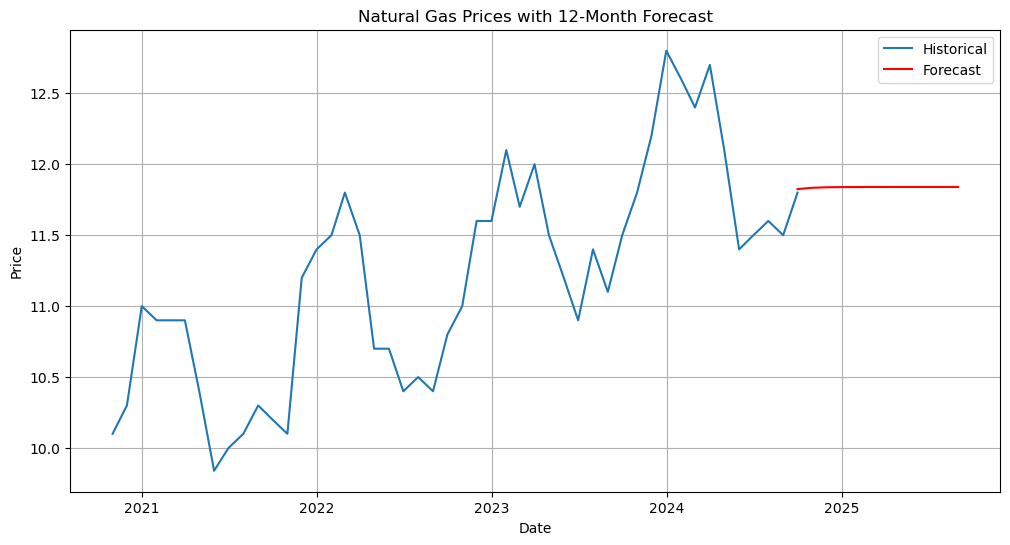

In [17]:
# Plot original data + forecast
plt.figure(figsize=(12,6))
plt.plot(df['Prices'], label='Historical')
plt.plot(pd.date_range(start=df.index[-1], periods=12, freq='M'), forecast, label='Forecast', color='red')
plt.title('Natural Gas Prices with 12-Month Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
# 📌 7) Create Price Estimator Function
# ===============================
def estimate_price(date_input):
    """
    Estimate natural gas price for a given date.
    """
    date_input = pd.to_datetime(date_input)
    if date_input in df.index:
        return f"Historical price on {date_input.date()}: {df.loc[date_input]['Prices']:.2f}"
    elif date_input > df.index[-1]:
        # Calculate how many months ahead
        steps_ahead = (date_input.year - df.index[-1].year) * 12 + (date_input.month - df.index[-1].month)
        if steps_ahead > 0:
            future_forecast = model_fit.forecast(steps=steps_ahead)
            return f"Forecasted price for {date_input.date()}: {future_forecast.iloc[-1]:.2f}"
        else:
            return "Date out of range."
    else:
        return "Date is before available data range."


In [24]:
# 📌 8) Test the Function
# ===============================
print("\nPrice Estimate Example:")
print(estimate_price('2025-05-31'))


Price Estimate Example:
Forecasted price for 2025-05-31: 11.84
